# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

In [9]:
shape_ = img.shape
shape_[0]

784

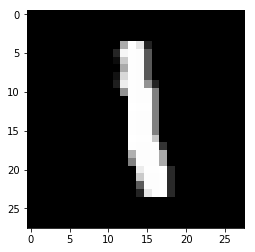

In [3]:
img = mnist.train.images[6]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [43]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,shape=(None, image_size), name="input")
targets_ = tf.placeholder(tf.float32,shape=(None, image_size), name="target")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits,name="outputs")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [44]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [45]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6878
Epoch: 1/20... Training loss: 0.6840
Epoch: 1/20... Training loss: 0.6792
Epoch: 1/20... Training loss: 0.6734
Epoch: 1/20... Training loss: 0.6670
Epoch: 1/20... Training loss: 0.6578
Epoch: 1/20... Training loss: 0.6484
Epoch: 1/20... Training loss: 0.6372
Epoch: 1/20... Training loss: 0.6244
Epoch: 1/20... Training loss: 0.6102
Epoch: 1/20... Training loss: 0.5951
Epoch: 1/20... Training loss: 0.5794
Epoch: 1/20... Training loss: 0.5649
Epoch: 1/20... Training loss: 0.5449
Epoch: 1/20... Training loss: 0.5308
Epoch: 1/20... Training loss: 0.5147
Epoch: 1/20... Training loss: 0.4967
Epoch: 1/20... Training loss: 0.4775
Epoch: 1/20... Training loss: 0.4577
Epoch: 1/20... Training loss: 0.4454
Epoch: 1/20... Training loss: 0.4317
Epoch: 1/20... Training loss: 0.4139
Epoch: 1/20... Training loss: 0.4028
Epoch: 1/20... Training loss: 0.3852
Epoch: 1/20... Training loss: 0.3768
E

Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1780
Epoch: 1/20... Training loss: 0.1828
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1793
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1806
Epoch: 1/20... Training loss: 0.1810
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1802
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1788
Epoch: 1/20... Training loss: 0.1783
Epoch: 1/20... Training loss: 0.1803
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1764
E

Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1479
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1426
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1502
E

Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1262
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1278
E

Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1186
E

Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1131
E

Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1115
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1059
E

Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1030
E

Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1021
E

Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0983
E

Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0971
E

Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0894
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0893
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0989
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0890
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0884
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0865
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

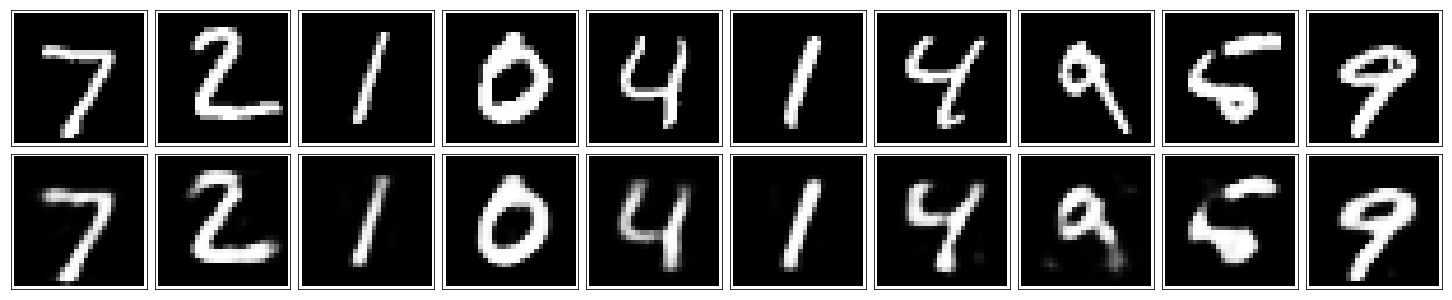

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [34]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.